# Dimentionality Reduction : Principal Component Analysis

### About Dataset:

Attribute Information:

1) ID number <br>
2) Diagnosis (M = malignant, B = benign) <br>
3-32) Ten real-valued features are computed for each cell nucleus:<br>

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry j) fractal dimension ("coastline approximation" - 1)<br>

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.<br>

All feature values are recoded with four significant digits.<br>

Missing attribute values: none<br>

Class distribution: 357 benign, 212 malignant<br>

**<font color = blue> AIM: To perform PCA on the dataset </font> **


## Loading Libraries and csv file:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
df= pd.read_csv("Breast Cancer.csv")

In [7]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [38]:
del df["Unnamed: 32"]
del df["id"]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## defining Target variable and Predictor variable

In [8]:
# now seperating the target and predictors
y = df["diagnosis"]
del df["diagnosis"]
x = df

In [11]:
del x["id"]
del x["Unnamed: 32"]

In [12]:
#df.head()
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [13]:
#check for the null values 
x.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Splitting the test data and train data

In [15]:
# now spliting the data into training and test datest
xtr,xts,ytr,yts = train_test_split(x,y,test_size = 0.20,random_state = 123)

In [16]:
#to know the shape these got 
print(xtr.shape)
print(ytr.shape)
print(xts.shape)
print(yts.shape)

(455, 30)
(455,)
(114, 30)
(114,)


## Building the Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier()

In [20]:
rfmodel = rf.fit(xtr,ytr)

## Prediction

In [21]:
predict = rfmodel.predict(xts)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [22]:
print(accuracy_score(yts,predict))
print(confusion_matrix(yts,predict))


0.982456140351
[[73  0]
 [ 2 39]]


In [47]:
print(classification_report(yts,predict))

             precision    recall  f1-score   support

          B       0.97      1.00      0.99        73
          M       1.00      0.95      0.97        41

avg / total       0.98      0.98      0.98       114



we got 98% precision after using all the features and we can identify 100% of class Malignant.

## Standardising the dataset

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
x = ss.fit_transform(x)
print(x[0:2])

[[  1.09706398e+00  -2.07333501e+00   1.26993369e+00   9.84374905e-01
    1.56846633e+00   3.28351467e+00   2.65287398e+00   2.53247522e+00
    2.21751501e+00   2.25574689e+00   2.48973393e+00  -5.65265059e-01
    2.83303087e+00   2.48757756e+00  -2.14001647e-01   1.31686157e+00
    7.24026158e-01   6.60819941e-01   1.14875667e+00   9.07083081e-01
    1.88668963e+00  -1.35929347e+00   2.30360062e+00   2.00123749e+00
    1.30768627e+00   2.61666502e+00   2.10952635e+00   2.29607613e+00
    2.75062224e+00   1.93701461e+00]
 [  1.82982061e+00  -3.53632408e-01   1.68595471e+00   1.90870825e+00
   -8.26962447e-01  -4.87071673e-01  -2.38458552e-02   5.48144156e-01
    1.39236330e-03  -8.68652457e-01   4.99254601e-01  -8.76243603e-01
    2.63326966e-01   7.42401948e-01  -6.05350847e-01  -6.92926270e-01
   -4.40780058e-01   2.60162067e-01  -8.05450380e-01  -9.94437403e-02
    1.80592744e+00  -3.69203222e-01   1.53512599e+00   1.89048899e+00
   -3.75611957e-01  -4.30444219e-01  -1.46748968e-01 

##  PCA for feature Reduction:

In [26]:
##since the predictors are standardised we can do PCA for dimentionality reduction
from sklearn.decomposition import PCA

**lets find out how many components explain 90% variance and adds up the value to the model**

In [28]:
pca.explained_variance_

array([  1.32816077e+01,   5.69135461e+00,   2.81794898e+00,
         1.98064047e+00,   1.64873055e+00,   1.20735661e+00,
         6.75220114e-01,   4.76617140e-01,   4.16894812e-01,
         3.50693457e-01,   2.93915696e-01,   2.61161370e-01,
         2.41357496e-01,   1.57009724e-01,   9.41349650e-02,
         7.98628010e-02,   5.93990378e-02,   5.26187835e-02,
         4.94775918e-02,   3.11594025e-02,   2.99728939e-02,
         2.74394025e-02,   2.43408378e-02,   1.80550070e-02,
         1.54812714e-02,   8.17763986e-03,   6.90046388e-03,
         1.58933787e-03,   7.48803097e-04,   1.33044823e-04])

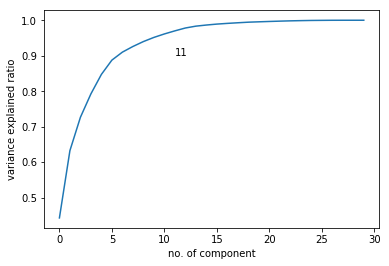

In [29]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no. of component")
plt.ylabel("variance explained ratio")
plt.annotate("11",xy=(11,.90))

In [30]:
#now when pca is been performed we take 11 n_components as at that point there is no effective change
print(pca) #now adding 11 in n_components 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


### Building Model reduced features
**since 11 components we think can solve problem and give best model**

** We will do the modelling again with 11 components and check the accuracy score for evaluation of the performance of the models**

In [31]:
new_x = PCA(n_components=11).fit_transform(x)   ## here the standardised x will use 11 best component for model
#the new improved pca dataframe

In [32]:
new_x[0:2]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511017,
         1.41142434,  2.15936765, -0.39841416, -0.15714094, -0.87742055,
         0.26297065],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177502,
         0.02865646,  0.01336014,  0.24099463, -0.71188463,  1.10701237,
         0.81310817]])

In [33]:
#now again we need to train the model with new_x
xtra,xtst,ytra,ytst = train_test_split(new_x,y,test_size = 0.20,random_state = 123)

In [34]:
print(xtra.shape)
print(xtst.shape)
print(ytra.shape)
print(ytst.shape)

(455, 11)
(114, 11)
(455,)
(114,)


In [35]:
rfa = RandomForestClassifier()

In [36]:
rfa.fit(xtra,ytra)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
rfa.feature_importances_

array([ 0.63249283,  0.07217663,  0.06181912,  0.03446109,  0.05862811,
        0.02718254,  0.02053973,  0.01986309,  0.02225183,  0.02491161,
        0.0256734 ])

In [38]:
rfa.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)>

In [41]:
pred = rfa.predict(xtst)

In [42]:
print(accuracy_score(ytst,pred))
print(confusion_matrix(ytst,pred))

0.947368421053
[[72  1]
 [ 5 36]]


In [43]:
print(ytst.count(),pred.shape)

114 (114,)


In [44]:
print(ytst.head(20),pred[0:21])

333    B
273    B
201    M
178    B
85     M
500    B
216    B
297    M
209    B
469    B
270    B
335    M
9      M
285    B
430    M
200    B
429    B
107    B
502    B
48     B
Name: diagnosis, dtype: object ['B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M']


In [45]:
print(f1_score(ytst,pred,average="weighted"))

0.946720647773


In [46]:
print(classification_report(ytst,pred))

             precision    recall  f1-score   support

          B       0.94      0.99      0.96        73
          M       0.97      0.88      0.92        41

avg / total       0.95      0.95      0.95       114



**summary**: <br>
So we got 95% precision after reduction of the features, though in medical analysis the precision matters the most , we can improve our model by tuning the hyperparameters.